# 2A.eco - Web-Scraping - correction

Correction d'exercices sur le Web Scraping.

Pour cet exercice, nous vous demandons d'obtenir 1) les informations personnelles des 721 pokemons sur le site internet [pokemondb.net](http://pokemondb.net/pokedex/national). Les informations que nous aimerions obtenir au final pour les pokemons sont celles contenues dans 4 tableaux :

- Pokédex data
- Training
- Breeding
- Base stats

Pour exemple : [Pokemon Database](http://pokemondb.net/pokedex/nincada).

2) Nous aimerions que vous récupériez également les images de chacun des pokémons et que vous les enregistriez dans un dossier  (indice : utilisez les modules request et [shutil](https://docs.python.org/3/library/shutil.html))
_pour cette question ci, il faut que vous cherchiez de vous même certains éléments, tout n'est pas présent dans le TD_.

In [1]:
import urllib
import bs4
import collections
import pandas as pd

# pour le site que nous utilisons, le user agent de python 3 n'est pas  bien passé :
# on le change donc pour celui de Mozilla

req = urllib.request.Request('http://pokemondb.net/pokedex/national', 
                             headers={'User-Agent': 'Mozilla/5.0'})
html = urllib.request.urlopen(req).read()
page = bs4.BeautifulSoup(html, "lxml")

# récupérer la liste des noms de pokémon

liste_pokemon =[]
for pokemon in page.findAll('span', {'class': 'infocard-lg-img'}) : 
    pokemon = pokemon.find('a').get('href').replace("/pokedex/",'')
    liste_pokemon.append(pokemon)

## Fonction pour obtenir les caractéristiques de pokemons

In [2]:
def get_page(pokemon_name):
    url_pokemon = 'http://pokemondb.net/pokedex/'+ pokemon_name
    req = urllib.request.Request(url_pokemon, headers = {'User-Agent' : 'Mozilla/5.0'})
    html = urllib.request.urlopen(req).read()
    return bs4.BeautifulSoup(html, "lxml")
     
    
def get_cara_pokemon(pokemon_name):
    page = get_page(pokemon_name)
    data = collections.defaultdict()
    
    # table Pokédex data, Training, Breeding, base Stats
    
    for table in page.findAll('table', { 'class' : "vitals-table"})[0:4] :
        table_body = table.find('tbody')
        for rows in table_body.findChildren(['tr']) : 
            if len(rows) > 1 : # attention aux tr qui ne contiennent rien
                column = rows.findChild('th').getText()
                cells = rows.findChild('td').getText()
                cells = cells.replace('\t','').replace('\n',' ')
                data[column] = cells
                data['name'] = pokemon_name
    return dict(data)
       
items = []       
for e, pokemon in enumerate(liste_pokemon) : 
    print(e, pokemon)
    item = get_cara_pokemon(pokemon)       
    items.append(item)
    if e > 20:
        break
df = pd.DataFrame(items)
df.head()

0 bulbasaur
1 ivysaur
2 venusaur
3 charmander
4 charmeleon
5 charizard
6 squirtle
7 wartortle
8 blastoise
9 caterpie
10 metapod
11 butterfree
12 weedle
13 kakuna
14 beedrill
15 pidgey
16 pidgeotto
17 pidgeot
18 rattata
19 raticate
20 spearow
21 fearow


,Abilities,Attack,Base Exp.,Base Friendship,Catch rate,Defense,EV yield,Egg Groups,Egg cycles,Gender,...,Height,Local №,National №,Sp. Atk,Sp. Def,Species,Speed,Type,Weight,name
0,1. OvergrowChlorophyll (hidden ability),49,64,70 (normal),"45 (5.9% with PokéBall, full HP)",49,1 Special Attack,"Grass, Monster","20 (4,884–5,140 steps)","87.5% male, 12.5% female",...,2′04″ (0.7 m),001 (Red/Blue/Yellow)226 (Gold/Silver/Crystal)...,001,65,65,Seed Pokémon,45,Grass Poison,15.2 lbs (6.9 kg),bulbasaur
1,1. OvergrowChlorophyll (hidden ability),62,142,70 (normal),"45 (5.9% with PokéBall, full HP)",63,"1 Special Attack, 1 Special Defense","Grass, Monster","20 (4,884–5,140 steps)","87.5% male, 12.5% female",...,3′03″ (1.0 m),002 (Red/Blue/Yellow)227 (Gold/Silver/Crystal)...,002,80,80,Seed Pokémon,60,Grass Poison,28.7 lbs (13.0 kg),ivysaur
2,1. OvergrowChlorophyll (hidden ability),82,236,70 (normal),"45 (5.9% with PokéBall, full HP)",83,"2 Special Attack, 1 Special Defense","Grass, Monster","20 (4,884–5,140 steps)","87.5% male, 12.5% female",...,6′07″ (2.0 m),003 (Red/Blue/Yellow)228 (Gold/Silver/Crystal)...,003,100,100,Seed Pokémon,80,Grass Poison,220.5 lbs (100.0 kg),venusaur
3,1. BlazeSolar Power (hidden ability),52,62,70 (normal),"45 (5.9% with PokéBall, full HP)",43,1 Speed,"Dragon, Monster","20 (4,884–5,140 steps)","87.5% male, 12.5% female",...,2′00″ (0.6 m),004 (Red/Blue/Yellow)229 (Gold/Silver/Crystal)...,004,60,50,Lizard Pokémon,65,Fire,18.7 lbs (8.5 kg),charmander
4,1. BlazeSolar Power (hidden ability),64,142,70 (normal),"45 (5.9% with PokéBall, full HP)",58,"1 Special Attack, 1 Speed","Dragon, Monster","20 (4,884–5,140 steps)","87.5% male, 12.5% female",...,3′07″ (1.1 m),005 (Red/Blue/Yellow)230 (Gold/Silver/Crystal)...,005,80,65,Flame Pokémon,80,Fire,41.9 lbs (19.0 kg),charmeleon


## les images de pokemon

In [3]:
import shutil
import requests


for e, pokemon in enumerate(liste_pokemon) : 
    print(e,pokemon)
    url = "https://img.pokemondb.net/artwork/{}.jpg".format(pokemon)
    response = requests.get(url, stream=True)
    # avec l'option stream, on ne télécharge pas l'objet de l'url
    with open('{}.jpg'.format(pokemon), 'wb') as out_file:
        shutil.copyfileobj(response.raw, out_file)
    if e > 20:
        break        

0 bulbasaur
1 ivysaur
2 venusaur
3 charmander
4 charmeleon
5 charizard
6 squirtle
7 wartortle
8 blastoise
9 caterpie
10 metapod
11 butterfree
12 weedle
13 kakuna
14 beedrill
15 pidgey
16 pidgeotto
17 pidgeot
18 rattata
19 raticate
20 spearow
21 fearow


In [4]:
import os
names = [name for name in os.listdir('.') if '.jpg' in name]
names[:3]

['beedrill.jpg', 'blastoise.jpg', 'bulbasaur.jpg']

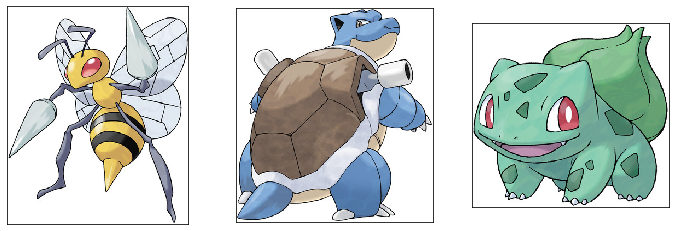

In [5]:
import matplotlib.pyplot as plt
import skimage.io as imio

fig, ax = plt.subplots(1, 3, figsize=(12,4))
for i, name in enumerate(names[:ax.shape[0]]):
    img = imio.imread(name)
    ax[i].imshow(img)
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)